In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

merged_data = pd.merge(order_products_prior, orders, on='order_id')


In [2]:
display(merged_data)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0


Total Orders: 3421083
Total Products: 49677
Average Products per Order: 10.09
Max Order Size: 145
Min Order Size: 1


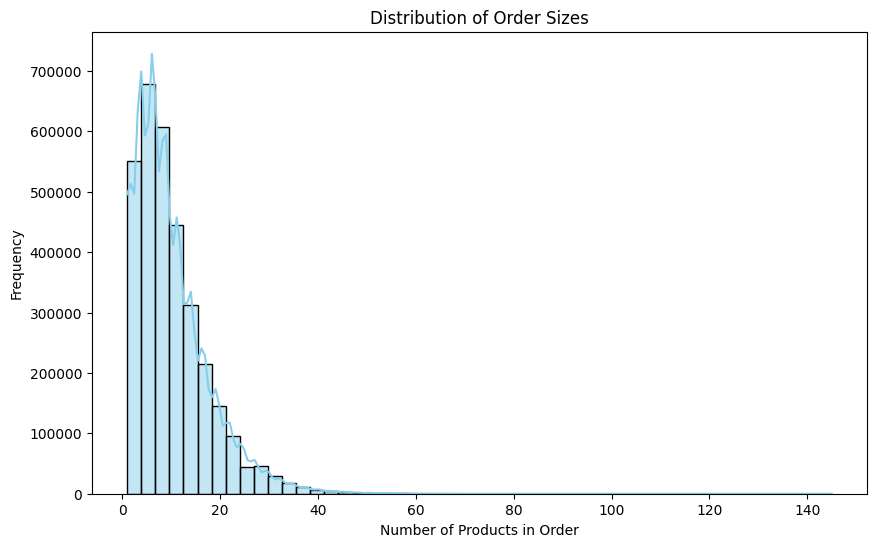

In [3]:
# Basic analysis
total_orders = orders['order_id'].nunique()
print(f"Total Orders: {total_orders}")

total_products = order_products_prior['product_id'].nunique()
print(f"Total Products: {total_products}")

average_products_per_order = order_products_prior.groupby('order_id')['product_id'].count().mean()
print(f"Average Products per Order: {average_products_per_order:.2f}")

# Distribution of order sizes
order_sizes = order_products_prior.groupby('order_id')['product_id'].count()
order_sizes.describe()
print(f"Max Order Size: {order_sizes.max()}")
print(f"Min Order Size: {order_sizes.min()}")

# Visualize the distribution of order sizes
plt.figure(figsize=(10, 6))
sns.histplot(order_sizes, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Order Sizes')
plt.xlabel('Number of Products in Order')
plt.ylabel('Frequency')
plt.show()



In [4]:
print(order_sizes.max())


145



Top 10 Most Reordered Products:
         product_id  reordered
0             24852     398609
472565        13176     315913
852015        21137     205845
1116698       21903     186884
1358619       47209     170131
1572203       47766     134044
1749018       27845     114510
1886923       47626     106255
2039580       27966     105409
2176637       16797      99802


/var/folders/n9/m3glrnr55ml8zq0dkchhng440000gn/T/ipykernel_27659/1400573031.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reordered', y='product_id', data=most_reordered_products.head(10), palette='viridis')


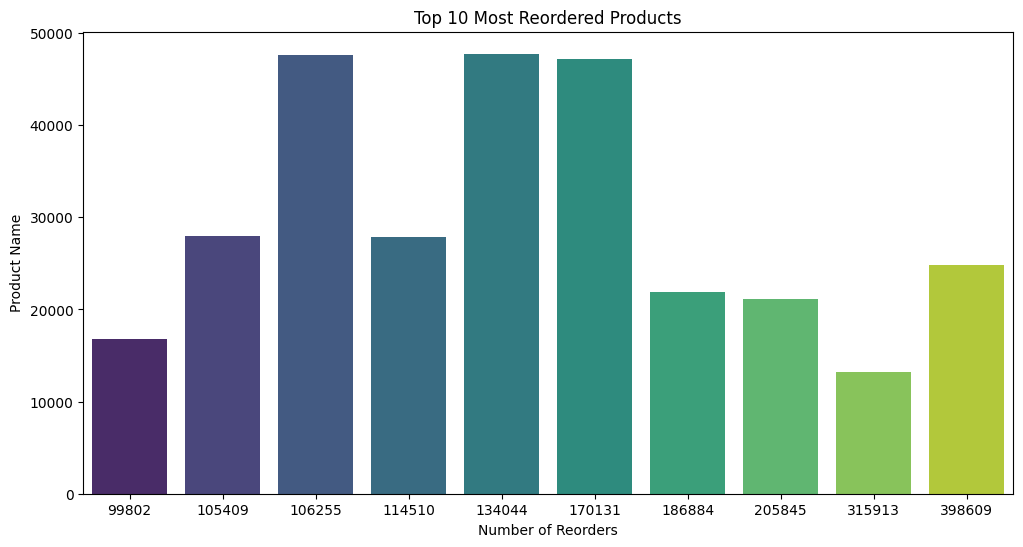

/var/folders/n9/m3glrnr55ml8zq0dkchhng440000gn/T/ipykernel_27659/1400573031.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='coolwarm')


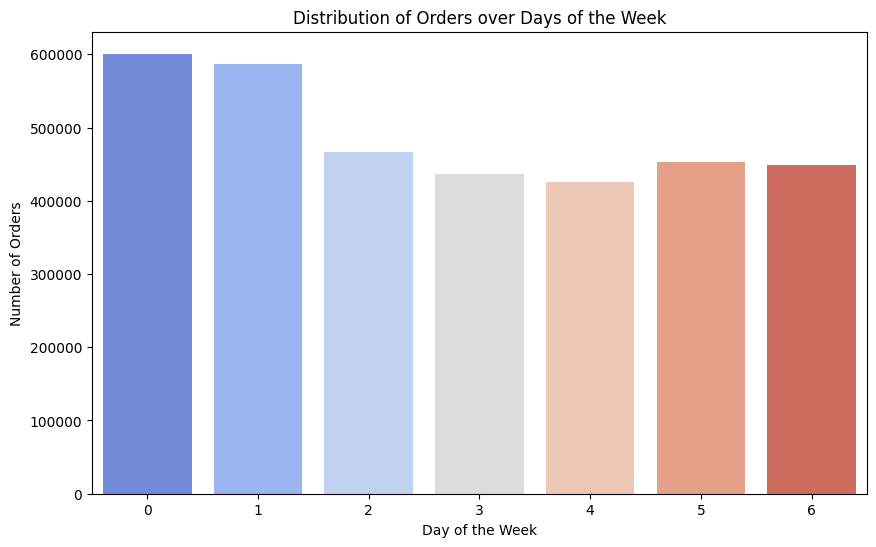

In [5]:

# Most reordered products
most_reordered_products = order_products_prior.groupby('product_id')['reordered'].sum().sort_values(ascending=False)
most_reordered_products = pd.merge(most_reordered_products, merged_data[['product_id']], on='product_id')
most_reordered_products = most_reordered_products.drop_duplicates(subset=['product_id'])

# Display the top 10 most reordered products
print("\nTop 10 Most Reordered Products:")
print(most_reordered_products.head(10))

# Visualize the top 10 most reordered products
plt.figure(figsize=(12, 6))
sns.barplot(x='reordered', y='product_id', data=most_reordered_products.head(10), palette='viridis')
plt.title('Top 10 Most Reordered Products')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.show()

# Day of the week analysis
day_of_week_counts = orders['order_dow'].value_counts().sort_index()

# Visualize the distribution of orders over days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='coolwarm')
plt.title('Distribution of Orders over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


In [6]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
# order_products_prior = pd.read_csv('order_products__prior.csv')
# orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')




In [7]:
# Feature: Number of orders per user
user_order_count = orders.groupby('user_id')['order_number'].max().reset_index()
user_order_count.columns = ['user_id', 'total_orders']
print(user_order_count)



        user_id  total_orders
0             1            11
1             2            15
2             3            13
3             4             6
4             5             5
...         ...           ...
206204   206205             4
206205   206206            68
206206   206207            17
206207   206208            50
206208   206209            14

[206209 rows x 2 columns]


In [10]:
 # Feature: Reorder rate per product
product_reorder_rate = order_products_prior.groupby('product_id')['reordered'].mean().reset_index()
product_reorder_rate.columns = ['product_id', 'reorder_rate']

# Merge features with order_products DataFrame
order_products = pd.merge(merged_data, user_order_count, on='user_id', how='left')
order_products = pd.merge(order_products, product_reorder_rate, on='product_id', how='left')
print(order_products)

          order_id  product_id  add_to_cart_order  reordered  user_id  \
0                2       33120                  1          1   202279   
1                2       28985                  2          1   202279   
2                2        9327                  3          0   202279   
3                2       45918                  4          1   202279   
4                2       30035                  5          0   202279   
...            ...         ...                ...        ...      ...   
32434484   3421083       39678                  6          1    25247   
32434485   3421083       11352                  7          0    25247   
32434486   3421083        4600                  8          0    25247   
32434487   3421083       24852                  9          1    25247   
32434488   3421083        5020                 10          1    25247   

         eval_set  order_number  order_dow  order_hour_of_day  \
0           prior             3          5                

In [11]:
order_products = pd.merge(order_products, products, on='product_id', how='left')
order_products = pd.merge(order_products, aisles, on='aisle_id', how='left')
order_products = pd.merge(order_products, departments, on='department_id', how='left')

print(order_products.isnull().sum())
order_products_train=pd.read_csv('order_products__train.csv')


order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
total_orders                    0
reorder_rate                    0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64


In [12]:
print(order_products)

          order_id  product_id  add_to_cart_order  reordered  user_id  \
0                2       33120                  1          1   202279   
1                2       28985                  2          1   202279   
2                2        9327                  3          0   202279   
3                2       45918                  4          1   202279   
4                2       30035                  5          0   202279   
...            ...         ...                ...        ...      ...   
32434484   3421083       39678                  6          1    25247   
32434485   3421083       11352                  7          0    25247   
32434486   3421083        4600                  8          0    25247   
32434487   3421083       24852                  9          1    25247   
32434488   3421083        5020                 10          1    25247   

         eval_set  order_number  order_dow  order_hour_of_day  \
0           prior             3          5                

In [13]:


# Define features and target variable
x=order_products[['total_orders','reorder_rate']]
# X= order_products[['total_orders', 'reorder_rate']]
y=order_products['reordered']


In [16]:


# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Assuming you have loaded the necessary DataFrames (orders, order_products, products, etc.)

# Calculate user-specific features
user_features = orders.groupby('user_id').agg({
    'order_number': 'max',  # Total number of orders placed by each user
    'days_since_prior_order': 'mean'  # Average days between orders for each user
}).reset_index()

# Calculate product-specific features
product_features = order_products.groupby('product_id').agg({
    'reordered': 'mean',  # Reorder rate for each product
    'add_to_cart_order': 'mean'  # Average position in the cart for each product
}).reset_index()

# Merge user-specific and product-specific features
user_product_features = pd.merge(order_products, user_features, on='user_id', how='left')
user_product_features = pd.merge(user_product_features, product_features, on='product_id', how='left')

# Add more features as needed

# Extract target variable (whether the product is reordered)
y = user_product_features['reordered']

# Select relevant features for training the model
X = user_product_features[['order_number', 'days_since_prior_order', 'add_to_cart_order']]

# Train your predictive model (e.g., Random Forest, XGBoost, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = model.predict(X_valid)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_valid, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_valid, predictions))
